Processing directory: /home/hp/results/C49U/H144Q/minim


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/MDAnalysis/analysis/rms.py:718: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalys

Processing directory: /home/hp/results/C49U/P142S/minim
Processing directory: /home/hp/results/C49U/T60A/minim


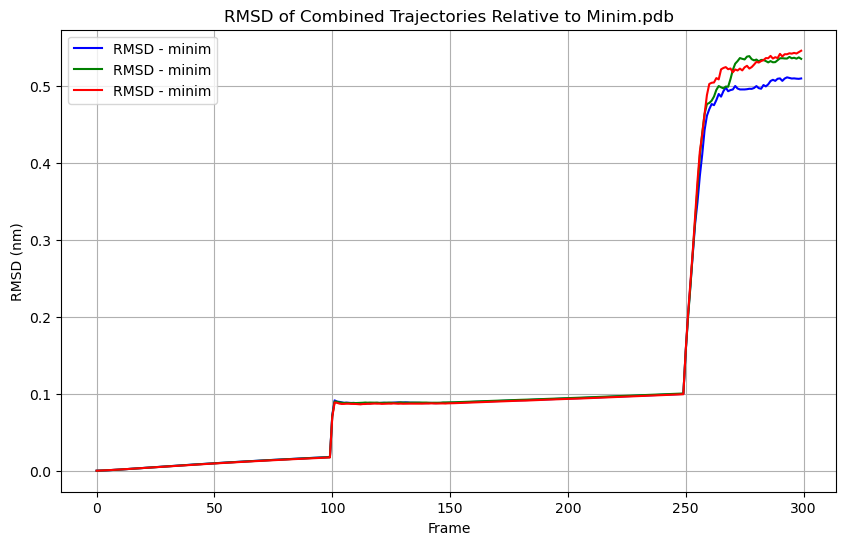

RMSD plot saved as /home/hp/results/C49U/rmsd_plot_combined_trajectories.png


In [7]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
import glob
import os
import matplotlib.pyplot as plt

# List of directories containing the combined_trajectory.dcd file
directories = [
    "/home/hp/results/C49U/H144Q/minim",
    "/home/hp/results/C49U/P142S/minim",
    "/home/hp/results/C49U/T60A/minim"
]

# Define colors for each directory's plot
colors = ["blue", "green", "red"]

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop through each directory and process the combined_trajectory.dcd file
for i, data_path in enumerate(directories):
    print(f"Processing directory: {data_path}")
    
    # Define the path to the combined_trajectory.dcd file
    dcd_file = os.path.join(data_path, "combined_trajectory.dcd")
    
    # Reference PDB file
    pdb_file = os.path.join(data_path, "minim.pdb")  # The PDB file in the same folder
    
    # Check if the .dcd file exists
    if not os.path.exists(dcd_file):
        print(f"Error: {dcd_file} not found.")
        continue
    
    # Load the reference structure
    u = mda.Universe(pdb_file, dcd_file)  # Load the combined trajectory
    
    # Set up an RMSD analysis object
    rmsd_analysis = RMSD(u, u, select="backbone")  # Calculate RMSD for backbone atoms
    rmsd_analysis.run()
    
    # Plot the RMSD for the current trajectory
    plt.plot(rmsd_analysis.rmsd[:, 2], label=f"RMSD - {os.path.basename(data_path)}", color=colors[i])

# Customize the plot
plt.xlabel("Frame")
plt.ylabel("RMSD (nm)")
plt.title("RMSD of Combined Trajectories Relative to Minim.pdb")
plt.legend()
plt.grid(True)

# Save and show the plot
output_plot_path = "/home/hp/results/C49U/rmsd_plot_combined_trajectories.png"
plt.savefig(output_plot_path)  # Save the plot
plt.show()

print(f"RMSD plot saved as {output_plot_path}")
